In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
path = '/content/penguins.csv'

In [5]:
dataframe = pd.read_csv(path)

In [6]:
dataframe.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
dataframe = dataframe.dropna()

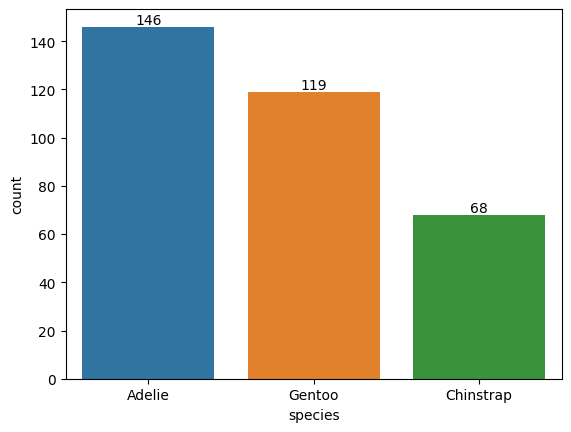

In [10]:
ax = sns.countplot(x='species', data=dataframe, hue='species')

for container in ax.containers:
  ax.bar_label(container)
plt.show()

In [11]:
X = dataframe[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y = dataframe['species']

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [23]:
model = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [24]:
pred = model.predict(test_X)
accuracy_score(test_y, pred)

0.8059701492537313

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)

pred = model.predict(test_X)
accuracy_score(test_y, pred)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9850746268656716

In [27]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_X, train_y)

pred = model.predict(test_X)
accuracy_score(test_y, pred)

0.9552238805970149

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(train_X, train_y)

pred = model.predict(test_X)
accuracy_score(test_y, pred)

0.9850746268656716

In [30]:
### Perform thr standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [31]:
model = LinearDiscriminantAnalysis()
model.fit(train_X, train_y)

pred = model.predict(test_X)
accuracy_score(test_y, pred)

0.9850746268656716

In [34]:
train_X = pd.DataFrame(train_X, columns=X.columns)
test_X = pd.DataFrame(test_X, columns=X.columns)

train_X = train_X[['bill_depth_mm', 'bill_length_mm']]
test_X = test_X[['bill_depth_mm', 'bill_length_mm']]

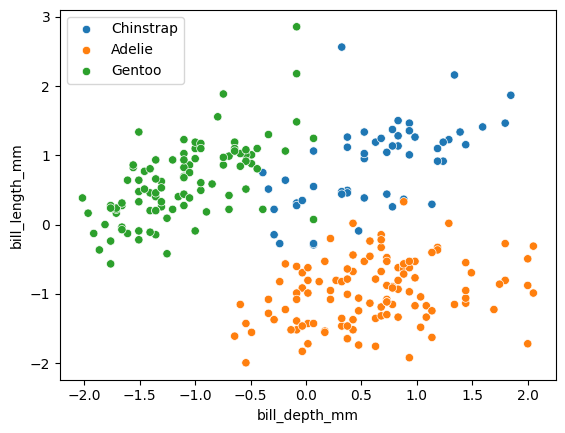

In [36]:
p = sns.scatterplot(x = 'bill_depth_mm', y = 'bill_length_mm', data = train_X, hue = train_y.values)
plt.show()

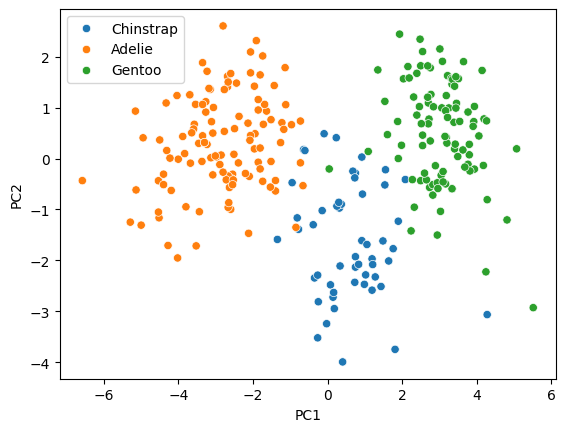

In [40]:
model = LinearDiscriminantAnalysis()
model.fit(train_X, train_y)

train_X = model.transform(train_X)
test_X = model.transform(test_X)

train_X = pd.DataFrame(train_X, columns=['PC1', 'PC2'])
test_X = pd.DataFrame(test_X, columns=['PC1', 'PC2'])

p = sns.scatterplot(x = 'PC1', y = 'PC2', data = train_X, hue = train_y.values)
plt.show()